In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mikeio import Dfsu, Mesh

# DURING DEVELOPMENT ONLY
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
filename = "../tests/testdata/oresund_sigma_z.dfsu"
dfs = Dfsu(filename)
dfs

Dfsu3DSigmaZ
Number of elements: 17118
Number of nodes: 12042
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Number of items: 3
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

In [67]:
dfs.items

[Z coordinate <ItemGeometry3D> (meter),
 Temperature <Temperature> (degree Celsius),
 Salinity <Salinity> (PSU)]

In [68]:
elem_ids = dfs.bottom_element_ids
print(elem_ids[:10])
print(dfs.top_element_ids[:10])
print(len(dfs.bottom_element_ids))

[ 0  5  9 13 17 21 25 29 33 37]
[ 4  8 12 16 20 24 28 32 36 40]
3700


In [69]:
geom = dfs.elements_to_geometry(elem_ids, node_layers='bottom')
geom

Unstructured Geometry
Number of nodes: 2820
Number of elements: 3700
Number of layers: 6
Projection: UTM-33

In [70]:
ze = geom.element_coordinates[:,2]
ze.min()

-33.0

## Save bottom layer to new mesh file

In [71]:
outmesh = "../tests/testdata/mesh_oresund_extracted.mesh"
dfs.to_mesh(outmesh)

## Evaluate top layer

In [72]:
elem_ids = dfs.top_element_ids

In [73]:
ds = dfs.read(element_ids=elem_ids)
print(ds)
max_t = ds['Temperature'].max()
print(f'Maximum temperature in top layer: {max_t:.1f}')

<mikeio.DataSet>
Dimensions: (3, 3700)
Time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)
Maximum temperature in top layer: 17.5


## Find position of max temperature in first time step and plot

In [74]:
timestep = 0
max_elem = ds['Temperature'][timestep,:].argmax()
top_element_coordinates = dfs.element_coordinates[dfs.top_element_ids]
max_x = top_element_coordinates[max_elem][0]
max_y = top_element_coordinates[max_elem][1]
max_x, max_y

(333934.085102392, 6158101.508170851)

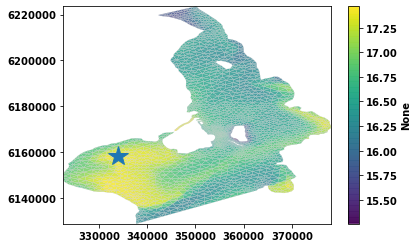

In [75]:
dfs.plot(z=ds['Temperature'][timestep,:])
plt.plot(max_x, max_y, marker='*', markersize=20);

# Assess profile
find water column which has highest temperature and plot profile for all 3 time steps

In [77]:
elem_ids = dfs.find_closest_profile_elements(max_x, max_y)
z_profile = dfs.element_coordinates[elem_ids,2]

In [78]:
ds_profile = dfs.read(items=['Temperature'], element_ids=elem_ids)

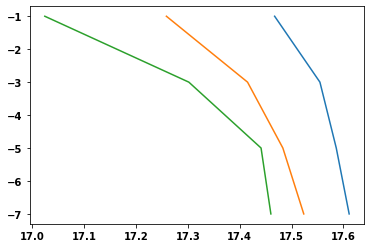

In [79]:
for timestep in range(len(ds_profile.time)):
    plt.plot(ds_profile[0][timestep, :],z_profile)

In [83]:
bot_elem_id = dfs.find_closest_element_index(max_x, max_y, -7)
bot_elem_id

5320

# Select top elements of a smaller area

In [49]:
eid = dfs.top_element_ids
xc = dfs.element_coordinates[eid,0]
yc = dfs.element_coordinates[eid,1]

In [50]:
mask = (yc>6192000)*(yc<6198000)
elem_ids = eid[mask]
len(elem_ids)

118

In [51]:
ds_sub = dfs.read(element_ids=elem_ids)
ds_sub

<mikeio.DataSet>
Dimensions: (3, 118)
Time: 1997-09-15 21:00:00 - 1997-09-16 03:00:00
Items:
  0:  Z coordinate <ItemGeometry3D> (meter)
  1:  Temperature <Temperature> (degree Celsius)
  2:  Salinity <Salinity> (PSU)

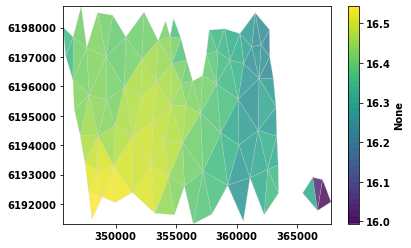

In [52]:
dfs.plot(z=ds_sub.data[1][0,:], element_ids=elem_ids)

In [53]:
dfs.write("../tests/testdata/oresund_data_extracted.dfsu", ds_sub, element_ids=elem_ids)

will redo extraction in 2d!


# Read vertical slice

In [54]:
filename = "../tests/testdata/oresund_vertical_slice.dfsu"
dfs = Dfsu(filename)
dfs

DfsuVerticalProfileSigmaZ
Number of elements: 441
Number of nodes: 550
Projection: UTM-33
Number of sigma layers: 4
Max number of z layers: 5
Number of items: 3
Time: 3 steps with dt=10800.0s
      1997-09-15 21:00:00 -- 1997-09-16 03:00:00

In [57]:
print(dfs.bottom_element_ids[:9])
print(dfs.n_layers_per_column[:9])
print(dfs.top_element_ids[:9])

[ 0  5 10 15 20 24 28 32 36]
[5 5 5 5 4 4 4 4 4]
[ 4  9 14 19 23 27 31 35 39]
